In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Loading and displaying data
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data is loaded successfully")

s_data.head(10)

Data is loaded successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Visualization 

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


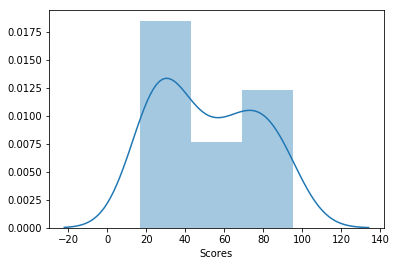

In [4]:
import seaborn as sns
sns.distplot(s_data.Scores)

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


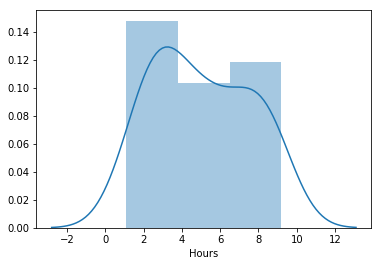

In [5]:
sns.distplot(s_data.Hours)

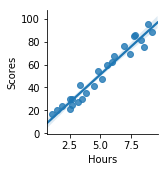

In [15]:
sns.pairplot(s_data, x_vars='Hours',y_vars='Scores',aspect=1, kind ='reg')

In [16]:
#calculating coef of corelation 
s_data.Hours.corr(s_data.Scores)

0.9761906560220887

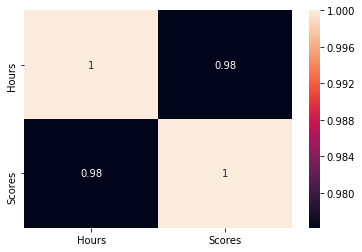

In [17]:
sns.heatmap(s_data.corr(), annot=True)

# Building a Linear Regression Model

In [21]:
X = s_data[['Hours']]
Y = s_data.Scores

In [22]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.85, random_state=1)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
linreg = LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [59]:
print(linreg.intercept_)
print(linreg.coef_)

4.734828496042212
[9.14248021]


# Prediction Making

In [60]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([14.79155673, 34.90501319, 22.1055409 , 82.44591029, 48.61873351])

In [64]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
14,17,14.791557
13,42,34.905013
17,24,22.105541
3,75,82.445910
21,54,48.618734
10,85,75.131926
18,67,60.503958
19,69,72.389182
4,30,36.733509
2,27,33.990765


# Model Evaluation Metrics

In [62]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 5.162868793475652


In [68]:
print('Root Mean Squared error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Root Mean Squared error: 5.906518283847428
